

lread (Reads):
This metric measures the number of data transfers per second between the system memory (where the operating system and kernel reside) and the user memory (where applications and user-level processes run).
It reflects how often data is read from memory to fulfill requests from applications.

lwrite (Writes):
Similar to lread, this metric counts the number of data transfers per second between system memory and user memory, but in the opposite direction (writing data).
It indicates how frequently data is written back to memory after processing by applications.

scall (System Calls):
A system call is a request made by an application to the operating system for a specific service (e.g., file I/O, process management, network communication).
scall measures the total number of system calls per second across all types.
High values may indicate active application interactions with the OS.

sread (System Read Calls):
This metric specifically tracks the number of read system calls per second.
Read calls involve retrieving data from storage devices (e.g., reading files, network data).

swrite (System Write Calls):
Similar to sread, swrite focuses on the number of write system calls per second.
Write calls involve storing data to storage devices (e.g., saving files, sending data over the network).

fork (System Fork Calls):
A fork call creates a new process (a copy of the existing process) in the operating system.
fork measures the number of process creation requests per second.
Frequent forks may impact system resources.

exec (System Exec Calls):
An exec call replaces the current process image with a new program.
exec counts the number of program execution requests per second.
It’s relevant when applications launch other programs.

rchar (Read Characters) and wchar (Write Characters):
These metrics track the number of characters transferred per second during read and write operations.
Useful for understanding data flow between applications and storage.

pgout (Page Out Requests) and ppgout (Paged Pages Out):
These metrics relate to paging, where data is moved between RAM and disk.
pgout measures the number of page out requests per second (moving data from RAM to disk).
ppgout counts the number of pages paged out per second.

pgfree (Free Pages) and pgscan (Scanned Pages):
pgfree represents the number of pages per second placed on the free list (available for reuse).
pgscan checks if pages can be freed (scans for unused pages).

atch (Page Attaches):
Measures the number of page attaches per second (reclaiming a page in memory to satisfy a page fault).
Relevant for memory management.

pgin (Page-In Requests) and ppgin (Paged Pages In):
pgin tracks the number of page-in requests per second (moving data from disk to RAM).
ppgin counts the number of pages paged in per second.

pflt (Protection Fault Page Faults) and vflt (Virtual Memory Page Faults):
pflt represents page faults caused by protection errors (e.g., copy-on-write).
vflt indicates page faults due to address translation.

runqsz (Process Run Queue Size):
Reflects the number of kernel threads waiting for a CPU to run.
High values may indicate CPU-bound conditions.

freemem (Free Memory) and freeswap (Free Swap):
freemem shows the number of memory pages available to user processes.
freeswap counts the number of disk blocks available for page swapping.

usr (User Mode Percentage):
Represents the portion of time (%) that CPUs run in user mode (executing user-level application code).
High user mode time indicates active application processing.
Remember, these metrics help system administrators and developers optimize performance and diagnose issues. Lower MTTR and efficient resource utilization are desirable goals.

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [281]:
df=pd.read_excel('compactiv.xlsx')

In [282]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [283]:
df.shape

(8192, 22)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [286]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [287]:
df.runqsz.value_counts()

runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64

In [288]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [289]:
df_num = df.select_dtypes(include = ['int64','float64'])

In [290]:
columns=df_num.columns
len(columns)

21

In [291]:
columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

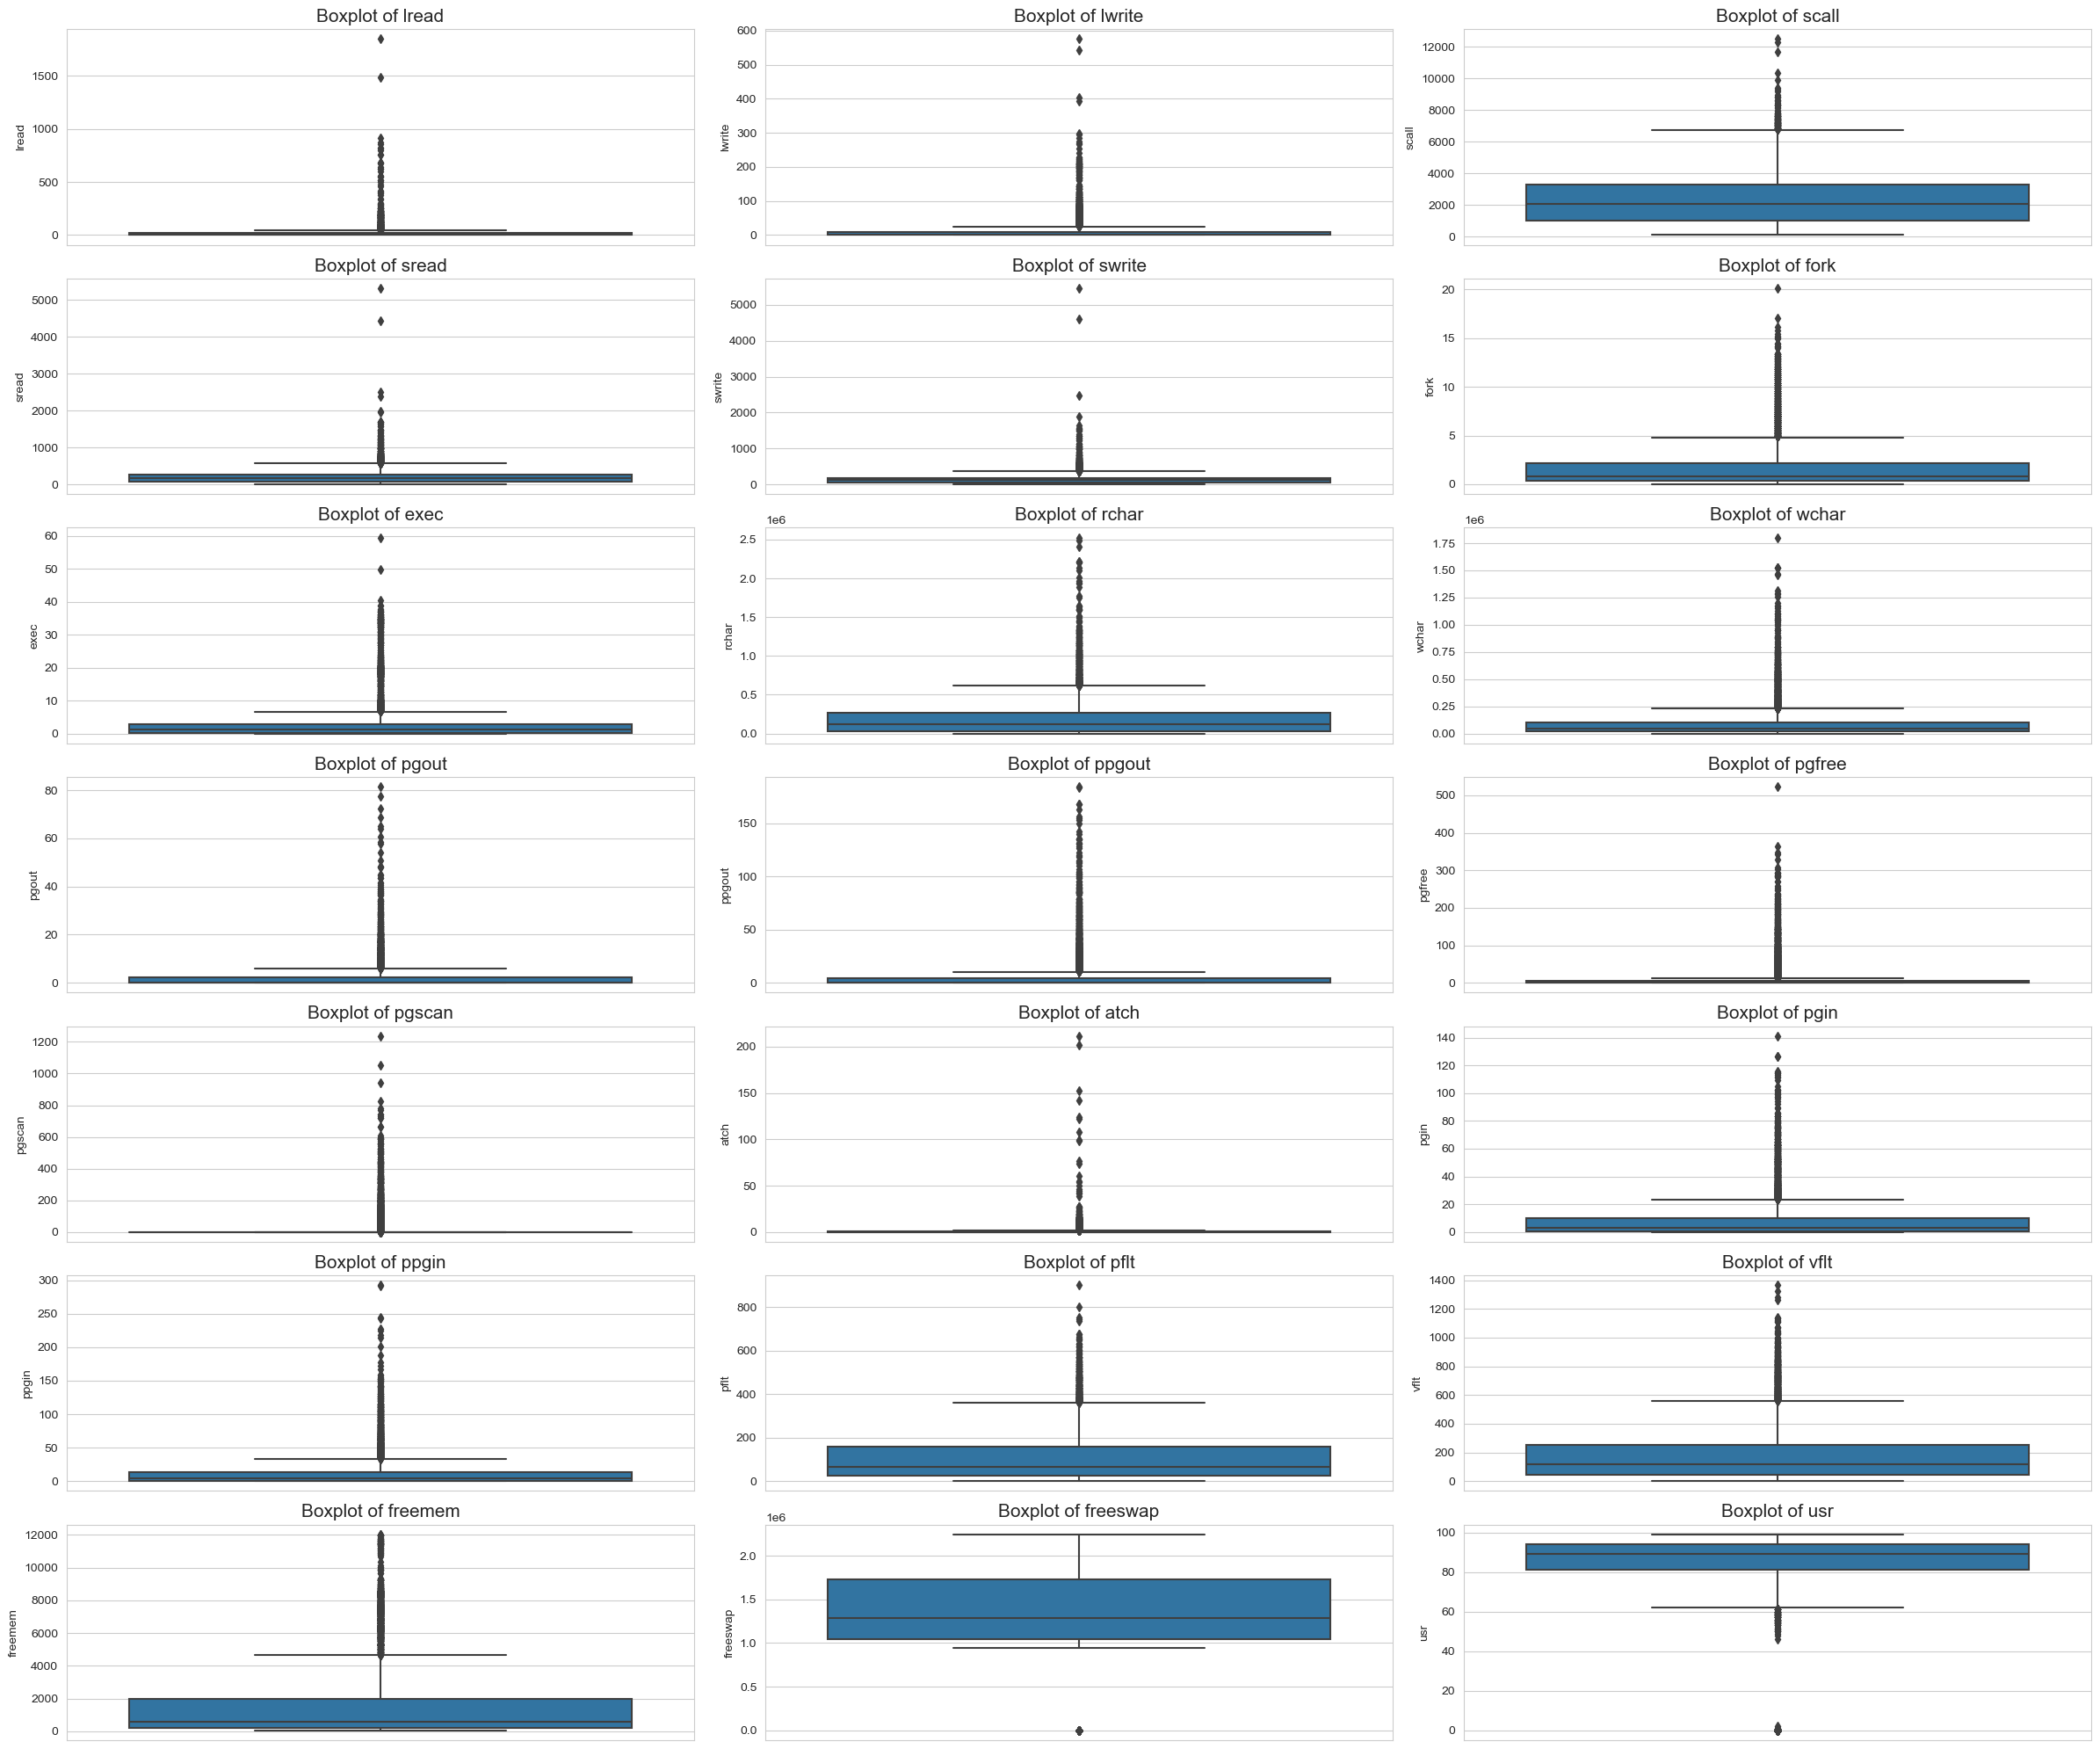

In [292]:
plt.figure(figsize = (24,20))
for i in range(len(columns)):
    plt.subplot(7,3, i + 1)
    sns.boxplot(y = df[columns[i]], data = df)
    plt.title('Boxplot of {}'.format(columns[i]),fontsize=15)
    plt.tight_layout()

In [293]:
from warnings import filterwarnings
filterwarnings("ignore")

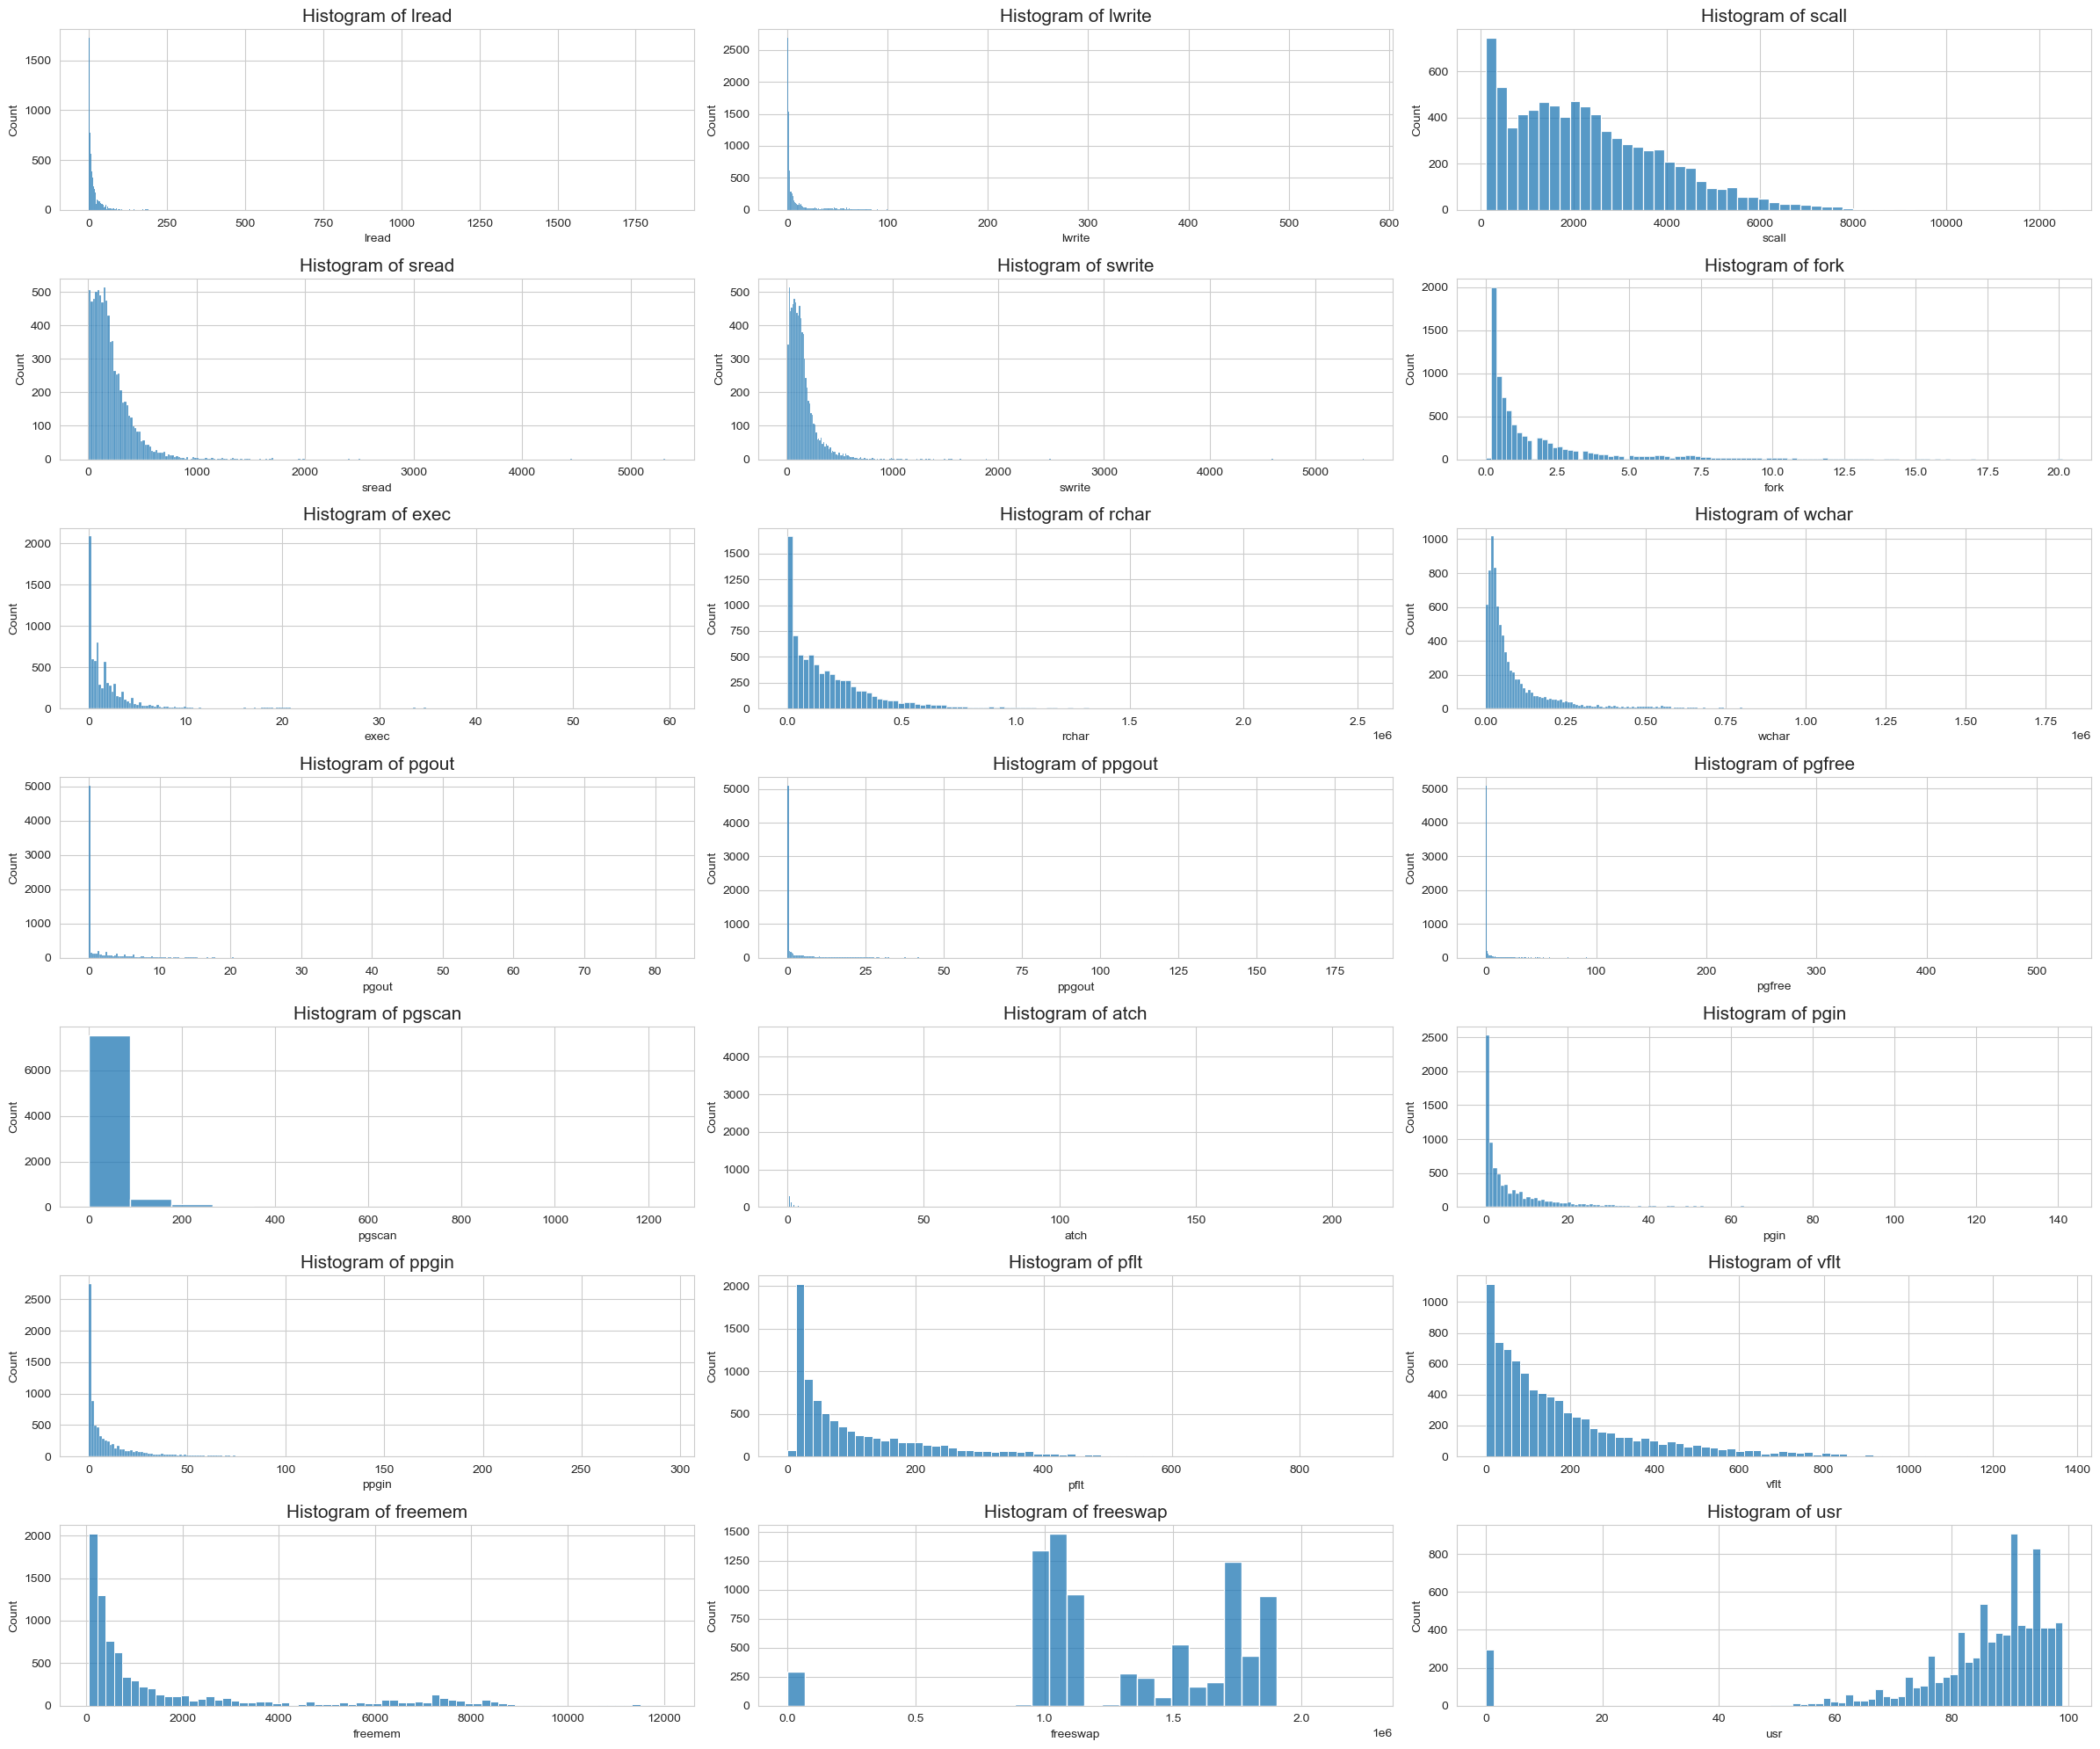

In [294]:
plt.figure(figsize = (24,20))
for i in range(len(columns)):
    plt.subplot(7,3, i + 1)
    sns.histplot(x = df[columns[i]], data = df)
    plt.title('Histogram of {}'.format(columns[i]),fontsize=15)
    plt.tight_layout()

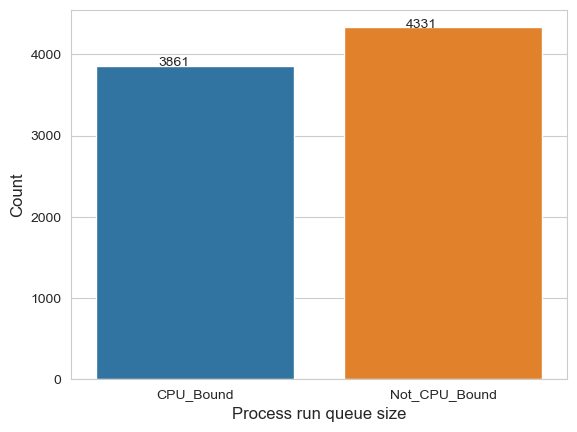

In [295]:
ax=sns.countplot(data=df,x='runqsz')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel('Process run queue size',fontsize=12)
plt.ylabel('Count',fontsize=12);

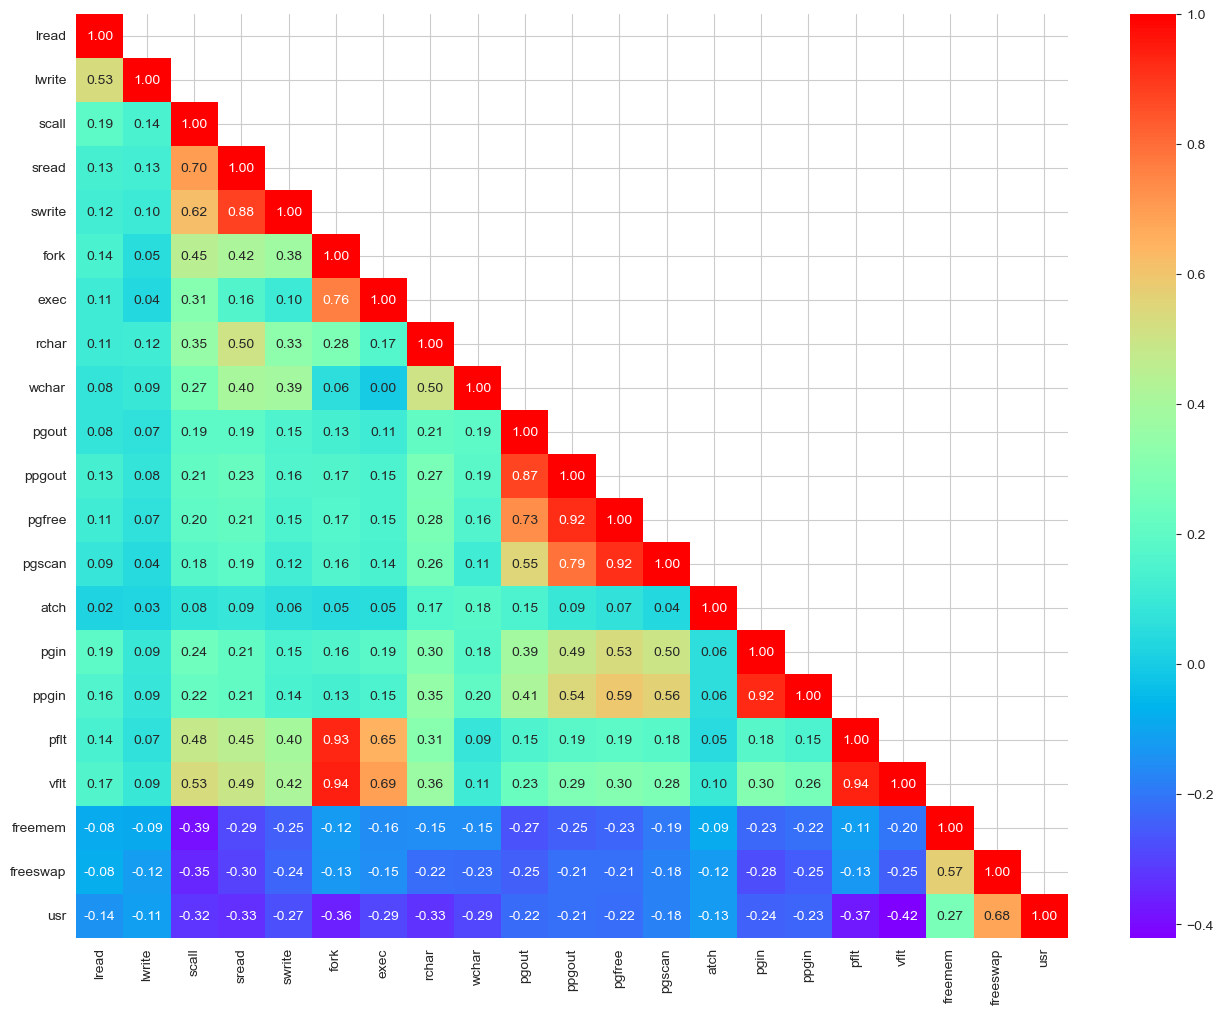

In [296]:
plt.figure(figsize=(16,12))
sns.heatmap(df_num.iloc[:,0:21].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df_num.iloc[:,0:21].corr(),+1))
plt.show()

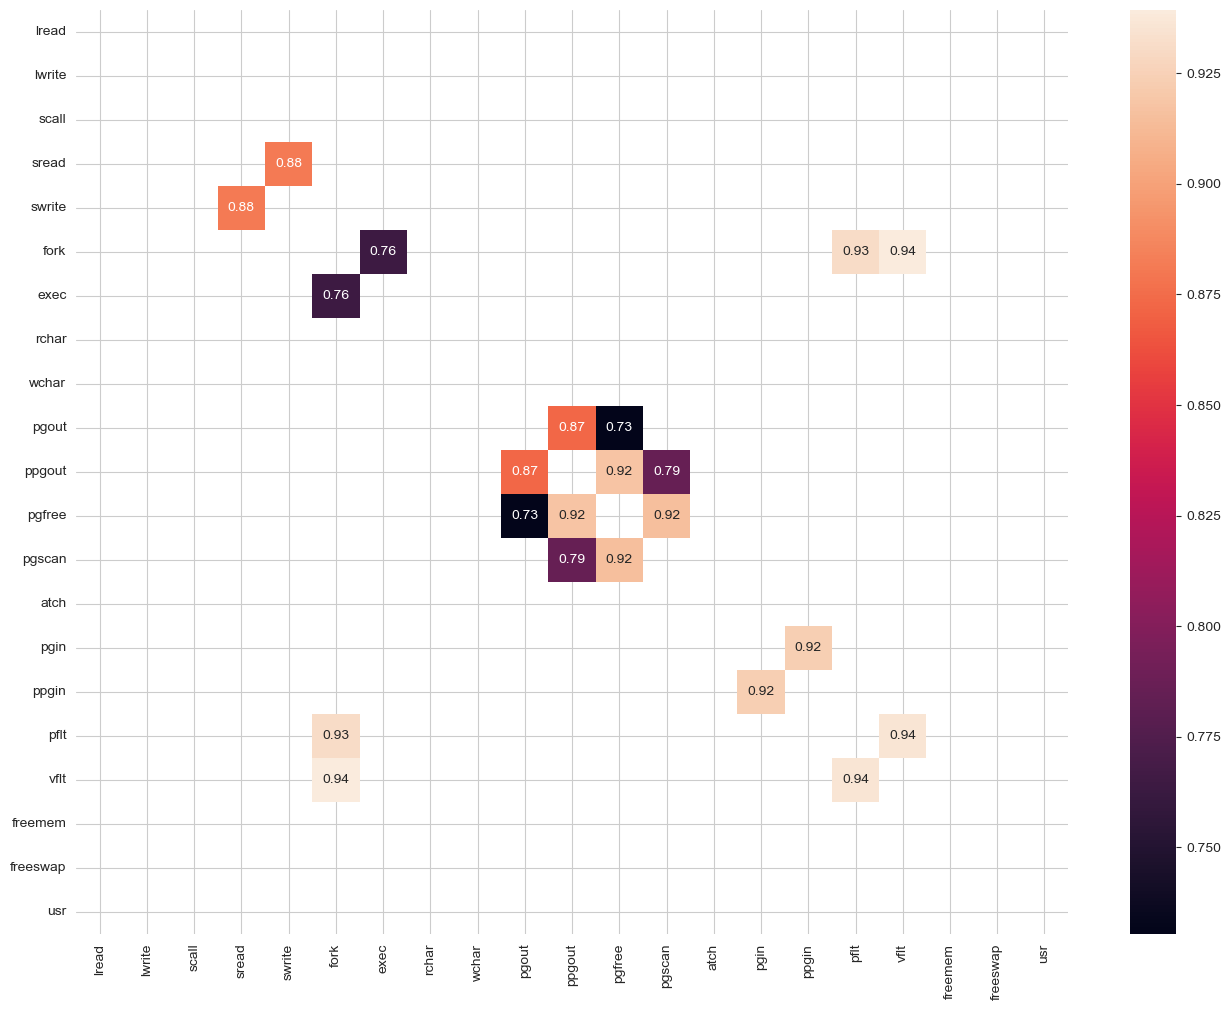

In [297]:
corr = df_num.corr()
max_corr = corr[(corr >= 0.7) & (corr < 1) ]
plt.figure(figsize=(16,12))
sns.heatmap(max_corr,annot=True);


## Treating Missing values:

In [298]:
for column in df.columns:
    if df[column].dtype != 'object':
        Median= df[column].median()
        df[column] = df[column].fillna(Median)

In [299]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [300]:
df.duplicated().sum()

0

In [301]:
df1= pd.get_dummies(df, columns=["runqsz"], drop_first=True)
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,False
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,True
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,True
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,True
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,True


In [302]:
df1['runqsz_Not_CPU_Bound']=df1['runqsz_Not_CPU_Bound'].astype('int')

In [303]:
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [304]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

In [305]:
df1.runqsz_Not_CPU_Bound.value_counts()

runqsz_Not_CPU_Bound
1    4331
0    3861
Name: count, dtype: int64

## Splitting the dataset 

In [306]:
x = df1.drop('usr', axis=1)
y = df1.pop('usr')

In [307]:
y.shape

(8192,)

In [308]:
x.shape

(8192, 21)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [310]:
X_train.shape

(5734, 21)

In [311]:
X_test.shape

(2458, 21)

# Linear Regression using statsmodel(OLS)

In [312]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [313]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:15:06   Log-Likelihood:                -21788.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.6380 

In [314]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 64.284 %


In [315]:
vif_series1= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   27.191591
lread                    1.472618
lwrite                   1.405898
scall                    2.414301
sread                    6.836403
swrite                   5.320692
fork                    18.210503
exec                     3.059950
rchar                    1.974726
wchar                    1.553348
pgout                    5.776005
ppgout                  15.906900
pgfree                  20.437584
pgscan                   9.237017
atch                     1.087328
pgin                     8.075699
ppgin                    8.672927
pflt                    11.834374
vflt                    20.233207
freemem                  1.677241
freeswap                 1.761193
runqsz_Not_CPU_Bound     1.118922
dtype: float64

